#Kavish Nag
#24070126085
#AIML B1

Practice datatset, except the ones told in class.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/global_cars_dataset_synthetic.csv')
df.head()

,Car_ID,Brand,Manufacture_Year,Body_Type,Fuel_Type,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Manufacturing_Country
0,CAR_0001,Mercedes,2006,SUV,Petrol,Manual,4089,547,17,73407,USA
1,CAR_0002,Nissan,2023,Coupe,Petrol,Automatic,4618,167,25,79370,USA
2,CAR_0003,Nissan,2007,Hatchback,Diesel,Manual,1802,110,16,76549,China
3,CAR_0004,Nissan,2013,Coupe,Petrol,Manual,1835,373,16,48722,USA
4,CAR_0005,Hyundai,2009,Hatchback,Hybrid,Automatic,2332,145,28,83265,UK


In [ ]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [ ]:
df['Transmission'] = df['Transmission'].str.strip().map({'Manual': 0, 'Automatic': 1})
df.head()

,Car_ID,Brand,Manufacture_Year,Body_Type,Fuel_Type,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Manufacturing_Country
0,CAR_0001,Mercedes,2006,SUV,Petrol,0,4089,547,17,73407,USA
1,CAR_0002,Nissan,2023,Coupe,Petrol,1,4618,167,25,79370,USA
2,CAR_0003,Nissan,2007,Hatchback,Diesel,0,1802,110,16,76549,China
3,CAR_0004,Nissan,2013,Coupe,Petrol,0,1835,373,16,48722,USA
4,CAR_0005,Hyundai,2009,Hatchback,Hybrid,1,2332,145,28,83265,UK


In [ ]:
df_enc=pd.get_dummies(df)
df_enc.head()

,Manufacture_Year,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Car_ID_CAR_0001,Car_ID_CAR_0002,Car_ID_CAR_0003,Car_ID_CAR_0004,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Manufacturing_Country_China,Manufacturing_Country_Germany,Manufacturing_Country_Japan,Manufacturing_Country_South Korea,Manufacturing_Country_UK,Manufacturing_Country_USA
0,2006,0,4089,547,17,73407,True,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,2023,1,4618,167,25,79370,False,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2007,0,1802,110,16,76549,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
3,2013,0,1835,373,16,48722,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
4,2009,1,2332,145,28,83265,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [ ]:
for col in df_enc.columns:
    if df_enc[col].dtype == 'bool':
      df_enc[col] = df_enc[col].astype(int)

In [ ]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 331 entries, Manufacture_Year to Manufacturing_Country_USA
dtypes: int64(331)
memory usage: 775.9 KB


In [ ]:
df_enc.head()

,Manufacture_Year,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Price_USD,Car_ID_CAR_0001,Car_ID_CAR_0002,Car_ID_CAR_0003,Car_ID_CAR_0004,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Manufacturing_Country_China,Manufacturing_Country_Germany,Manufacturing_Country_Japan,Manufacturing_Country_South Korea,Manufacturing_Country_UK,Manufacturing_Country_USA
0,2006,0,4089,547,17,73407,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2023,1,4618,167,25,79370,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2007,0,1802,110,16,76549,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,2013,0,1835,373,16,48722,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,2009,1,2332,145,28,83265,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
cols = [i for i in range(df_enc.shape[1]) if i != 5]
x = df_enc.iloc[:, cols]
x

,Manufacture_Year,Transmission,Engine_CC,Horsepower,Mileage_km_per_l,Car_ID_CAR_0001,Car_ID_CAR_0002,Car_ID_CAR_0003,Car_ID_CAR_0004,Car_ID_CAR_0005,...,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Manufacturing_Country_China,Manufacturing_Country_Germany,Manufacturing_Country_Japan,Manufacturing_Country_South Korea,Manufacturing_Country_UK,Manufacturing_Country_USA
0,2006,0,4089,547,17,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2023,1,4618,167,25,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2007,0,1802,110,16,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2013,0,1835,373,16,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,2009,1,2332,145,28,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2015,1,3572,137,30,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
296,2023,0,4348,342,21,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
297,2020,1,3538,151,10,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
298,2023,0,3954,442,10,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
y = df_enc.iloc[:, 5]
y

,Price_USD
0,73407
1,79370
2,76549
3,48722
4,83265
...,...
295,74301
296,97523
297,66351
298,85653


In [ ]:
from sklearn.model_selection import train_test_split
x_train,X,y_train,Y=train_test_split(x,y,test_size=0.3,random_state=24)
x_val,x_test,y_val,y_test=train_test_split(X,Y,test_size=0.5,random_state=24)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model using the training data
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept: ", model.intercept_)
print("Coefficients: ")
list(zip(x_train, model.coef_))

Intercept:  390745.30505029747
Coefficients: 


[('Manufacture_Year', np.float64(-173.5642751177305)),
 ('Transmission', np.float64(4142.0960059675435)),
 ('Engine_CC', np.float64(2.4970895400874724)),
 ('Horsepower', np.float64(30.55387194045943)),
 ('Mileage_km_per_l', np.float64(-51.76770988191538)),
 ('Car_ID_CAR_0001', np.float64(-2.1827872842550278e-10)),
 ('Car_ID_CAR_0002', np.float64(28483.975417641777)),
 ('Car_ID_CAR_0003', np.float64(30074.27728165097)),
 ('Car_ID_CAR_0004', np.float64(-1.9099388737231493e-10)),
 ('Car_ID_CAR_0005', np.float64(14014.928690911645)),
 ('Car_ID_CAR_0006', np.float64(5862.822824037965)),
 ('Car_ID_CAR_0007', np.float64(11250.864712424896)),
 ('Car_ID_CAR_0008', np.float64(11400.50381854417)),
 ('Car_ID_CAR_0009', np.float64(3521.044798078983)),
 ('Car_ID_CAR_0010', np.float64(-51252.71262896391)),
 ('Car_ID_CAR_0011', np.float64(-26197.459939186956)),
 ('Car_ID_CAR_0012', np.float64(-12963.09220830603)),
 ('Car_ID_CAR_0013', np.float64(2589.2279408375116)),
 ('Car_ID_CAR_0014', np.float64(-2

In [ ]:
y_val_pred=model.predict(x_val)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_val,y_val_pred)

-0.10696021604628592

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_val_pred)

1270117833.2653317

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
mean_squared_error(y_pred,y_test)

1691196977.5034292

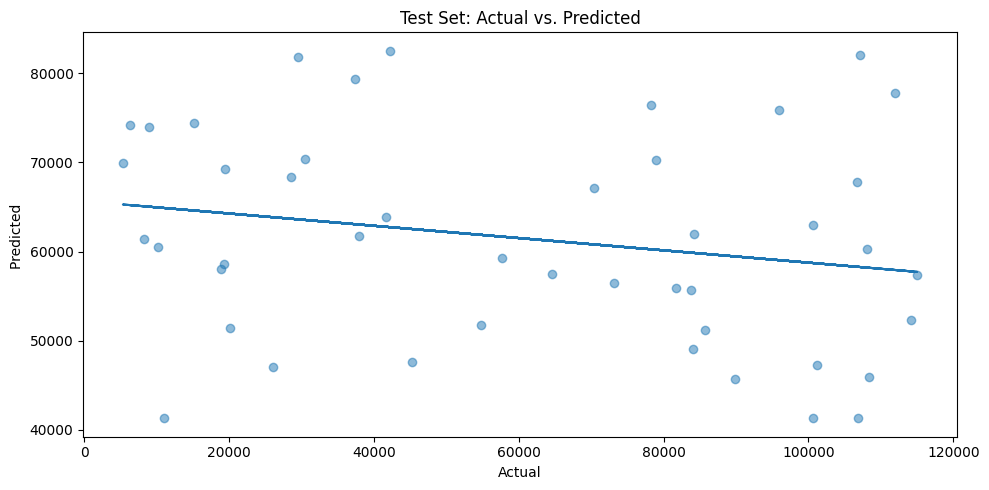

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.scatter(y_test, y_pred, alpha=0.5)

# Fit linear regression line
m, b = np.polyfit(y_test, y_pred, 1)   # slope and intercept
plt.plot(y_test, m*y_test + b)

plt.xlabel('Actual')
plt.ylabel('Predicted ')
plt.title('Test Set: Actual vs. Predicted')

plt.tight_layout()
plt.show()
